In [2]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#import category_encoders as ce
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import KFold
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',1000)

In [7]:
#Read the Data
data = pd.read_csv("hypothyroid.csv")
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative


In [8]:
# Check the data types of the data
data.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

<AxesSubplot:xlabel='Class', ylabel='count'>

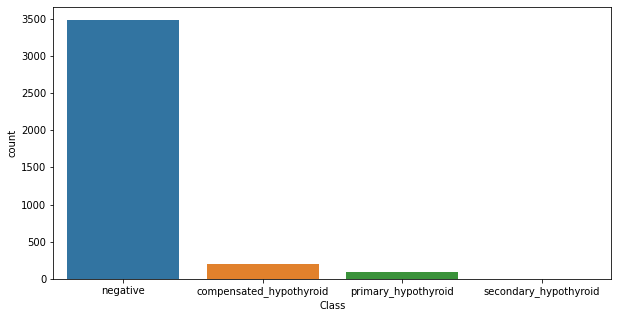

In [9]:
# Checking the distribution of the target column
plt.figure(figsize=(10,5))

sns.countplot(data["Class"])

### We don't have any NaN values in the dataset. But the missing values are stored as "?". Below code is used to display the column and how many values they have

In [10]:
def find_missing_values(df):
    for column in df.columns:
        count = df[df[column] == "?"][column].count()
        if count!= 0:
            print(f"the {column} column has {count} missing values")

In [11]:
find_missing_values(data)

the age column has 1 missing values
the sex column has 150 missing values
the TSH column has 369 missing values
the T3 column has 769 missing values
the TT4 column has 231 missing values
the T4U column has 387 missing values
the FTI column has 385 missing values
the TBG column has 3772 missing values


### Now we know the features name and count of missing value , we must have to replace with NaN values

In [12]:
def replace_missing_values(df):
    for column in df.columns:
        count = df[df[column] == "?"][column].count()
        if count!= 0:
            df[column] = data[column].replace("?",np.nan)

In [13]:
replace_missing_values(data)

In [14]:
# Checking the missing values in the data
data.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

### TBG column has no value. We don't need this column and will drop from our dataset

In [15]:
data.drop(["TBG","TBG_measured"],axis=1,inplace=True)

#### Dividing the features into Categorical and Numerical features

In [16]:
categorical_features = [feature for feature in data.columns if len(data[feature].unique()) < 10]
categorical_features

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'referral_source',
 'Class']

In [17]:
numerical_features = [feature for feature in data.columns if feature not in categorical_features]
numerical_features

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [18]:
data[categorical_features].head(10)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,referral_source,Class
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVHC,negative
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,other,negative
2,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,other,negative
3,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,other,negative
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVI,negative
5,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,f,t,t,t,other,negative
6,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,other,negative
7,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVI,negative
8,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,t,t,t,t,SVI,negative
9,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,SVI,negative


In [19]:
data[numerical_features].head(10)

,age,TSH,T3,TT4,T4U,FTI
0,41,1.3,2.5,125,1.14,109
1,23,4.1,2,102,NaN,NaN
2,46,0.98,NaN,109,0.91,120
3,70,0.16,1.9,175,NaN,NaN
4,70,0.72,1.2,61,0.87,70
5,18,0.03,NaN,183,1.3,141
6,59,NaN,NaN,72,0.92,78
7,80,2.2,0.6,80,0.7,115
8,66,0.6,2.2,123,0.93,132
9,68,2.4,1.6,83,0.89,93


In [20]:
#Converting those features who are numerical but stored as categorical back to numerical
for feature in numerical_features:
    data[feature] = data[feature].astype("float64")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'TSH'}>],
       [<AxesSubplot:title={'center':'T3'}>,
        <AxesSubplot:title={'center':'TT4'}>],
       [<AxesSubplot:title={'center':'T4U'}>,
        <AxesSubplot:title={'center':'FTI'}>]], dtype=object)

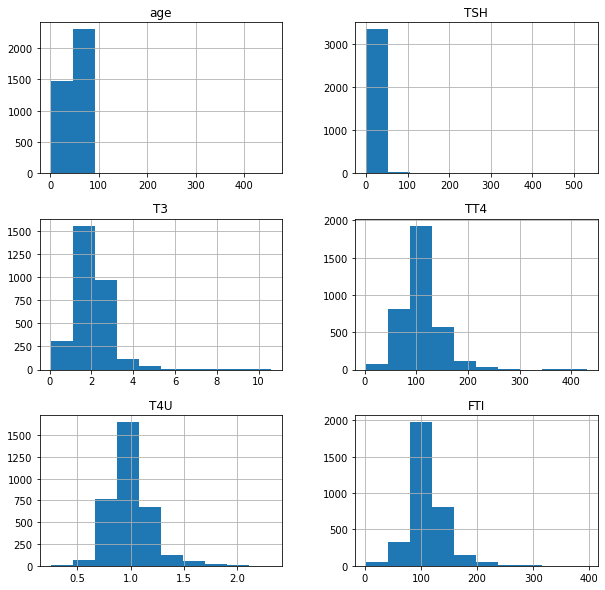

In [21]:
data.hist(figsize = (10,10))

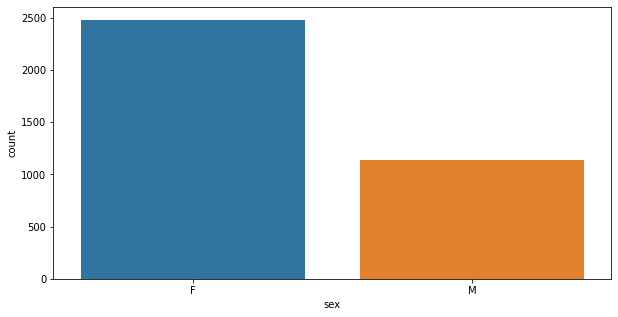

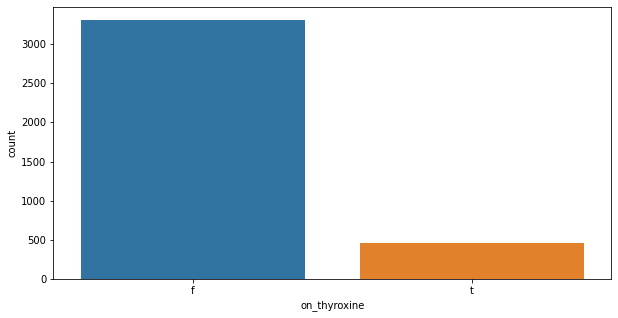

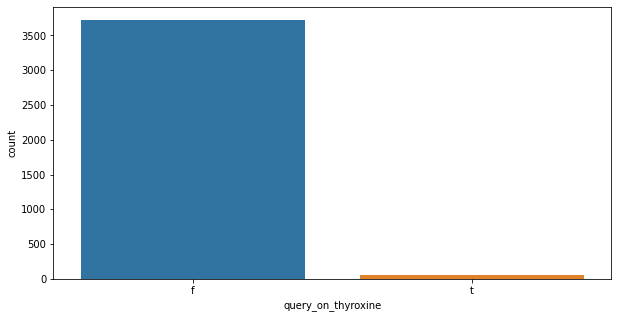

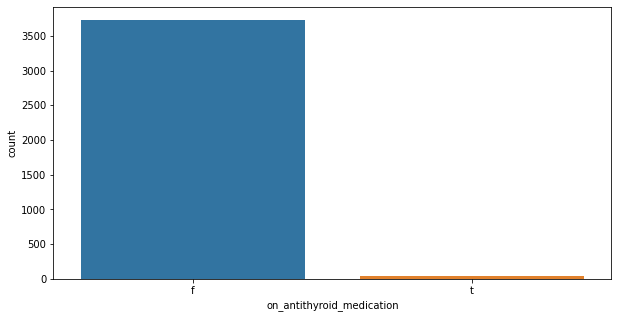

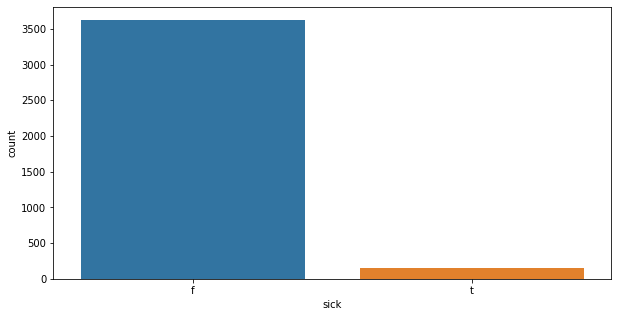

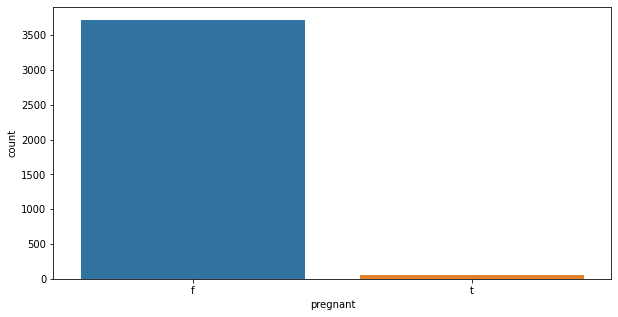

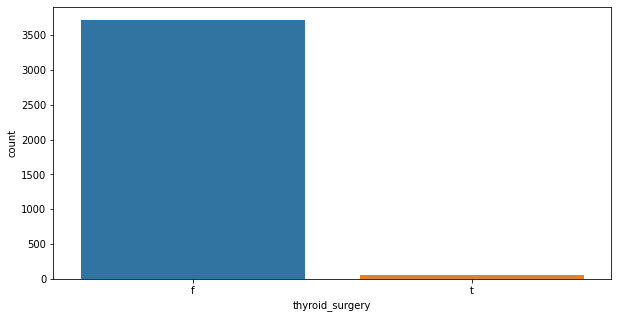

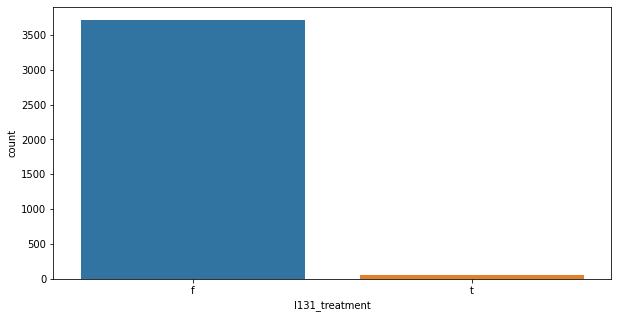

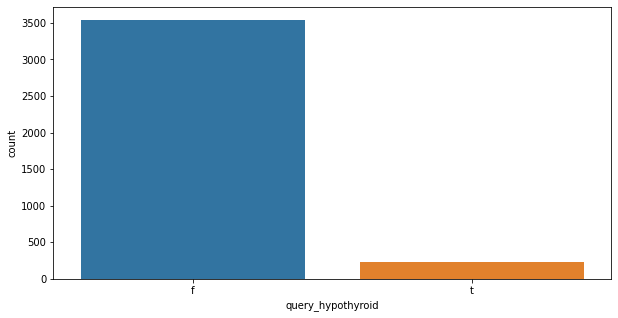

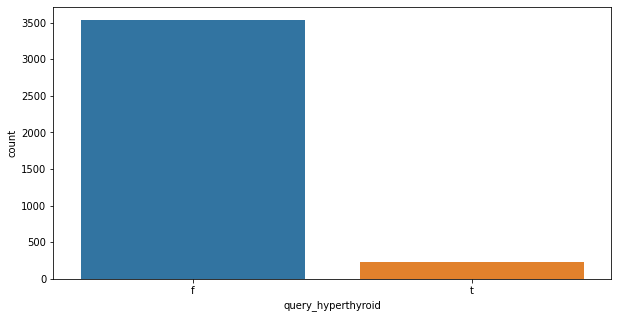

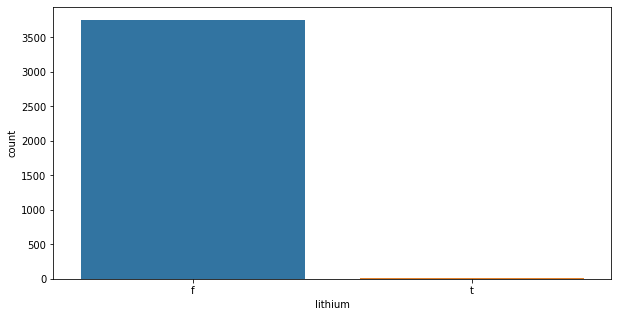

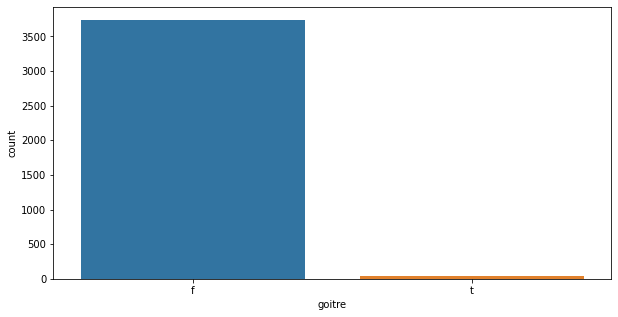

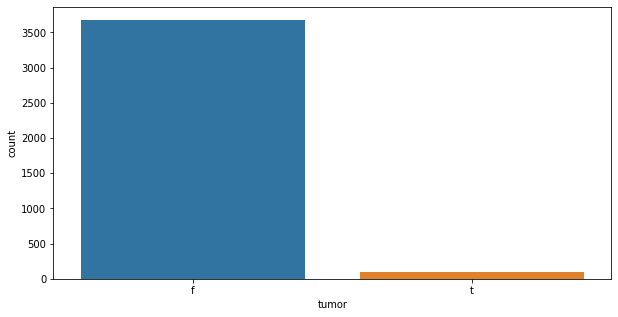

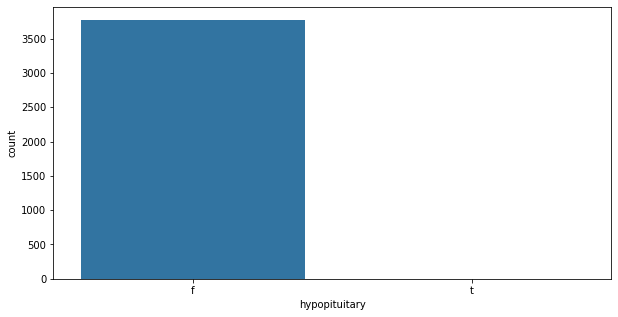

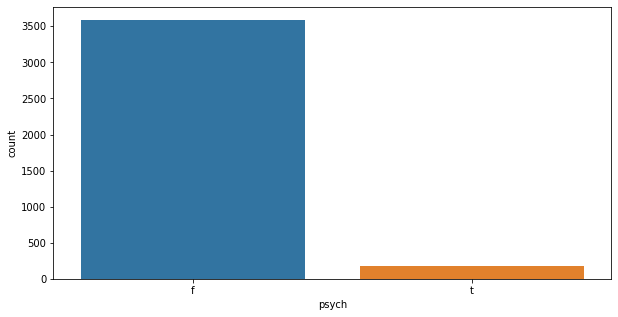

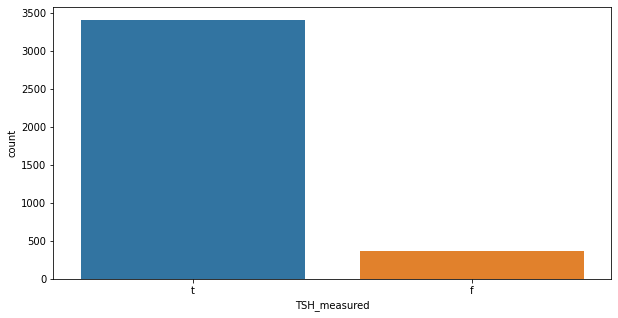

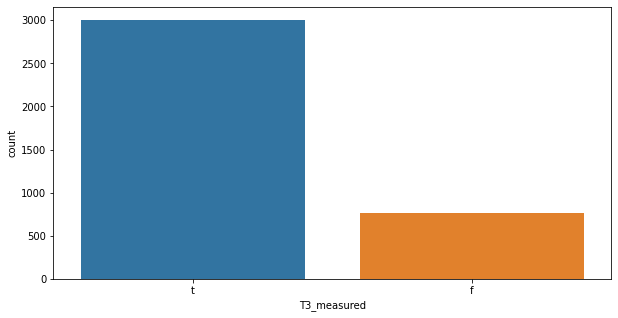

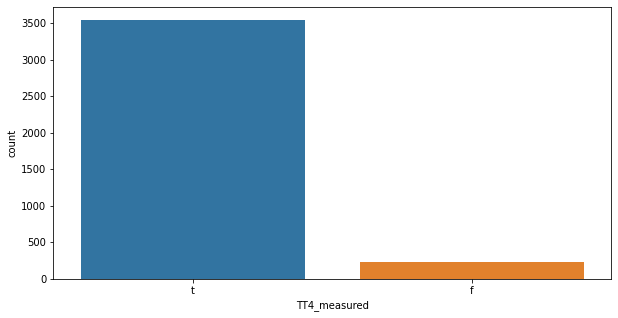

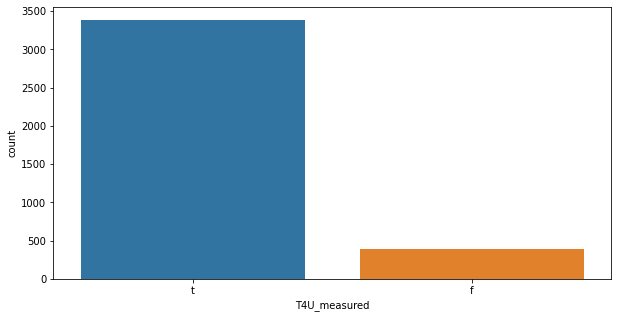

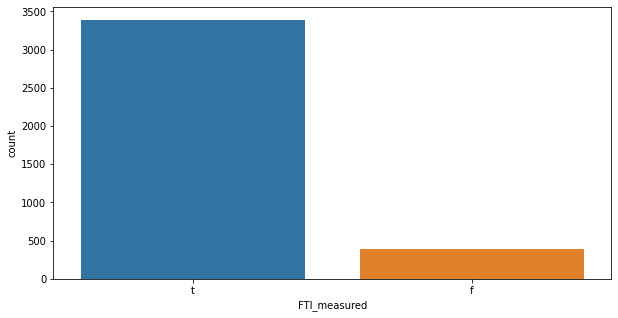

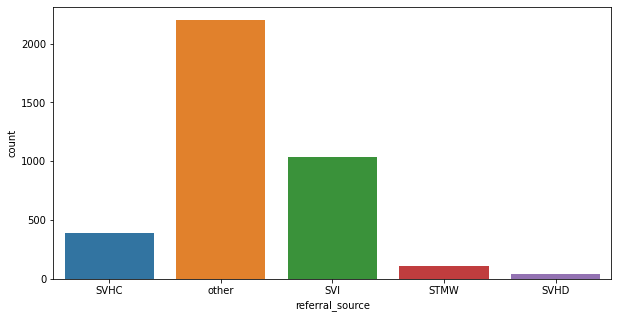

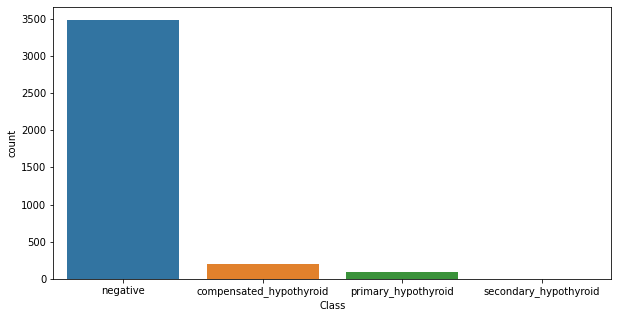

In [22]:
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data[feature])
    plt.xlabel(feature)
    plt.show()

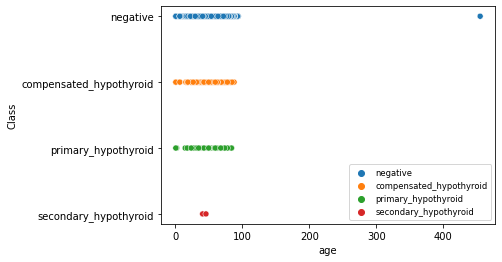

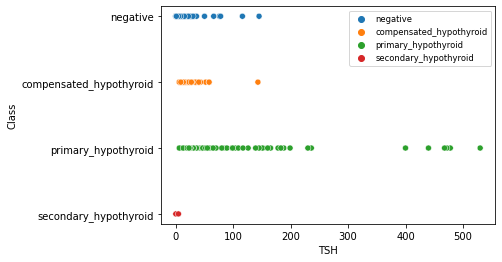

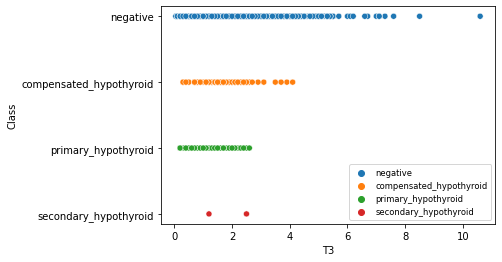

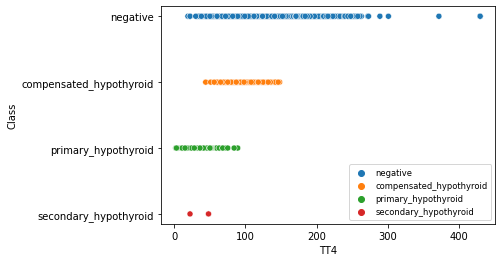

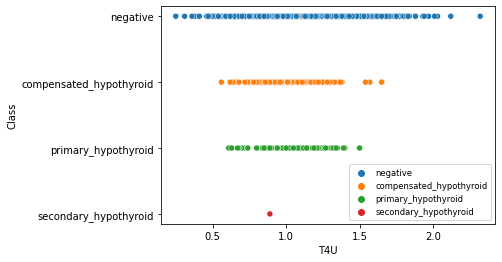

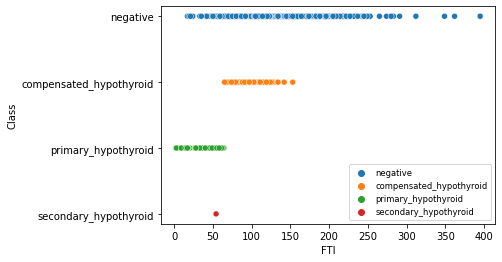

In [19]:
for feature in numerical_features:
    sns.scatterplot(x=data[feature], y=data["Class"], hue=data["Class"])
    plt.legend(loc='best',fontsize='small')
    plt.show()   

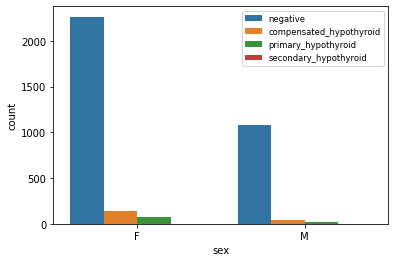

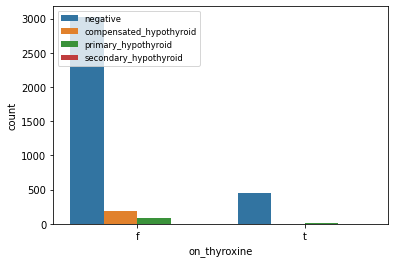

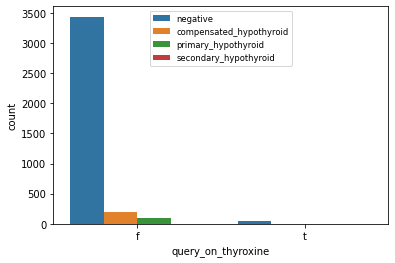

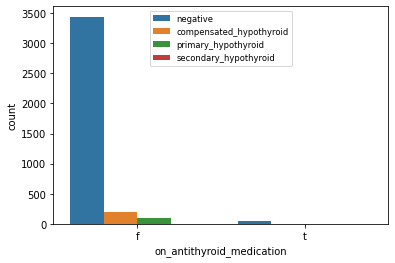

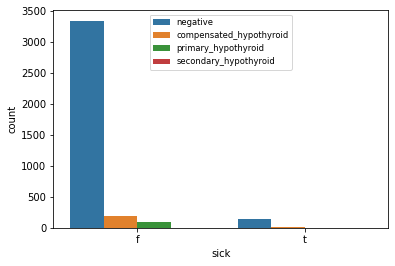

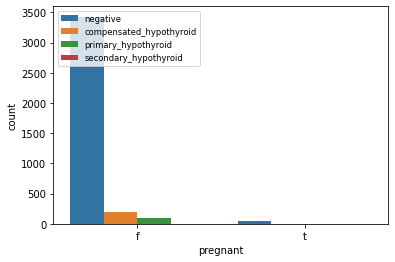

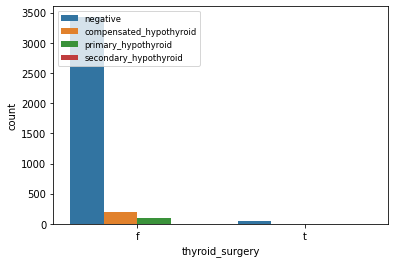

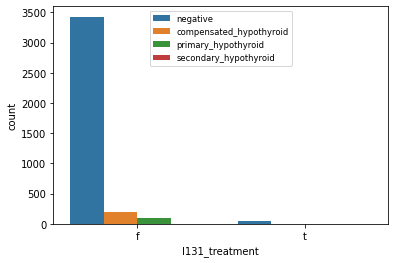

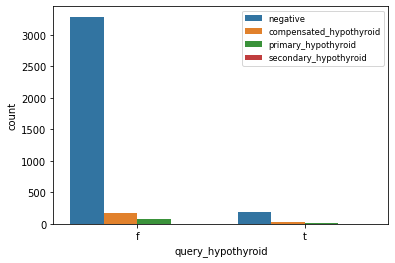

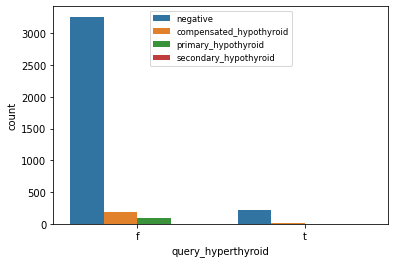

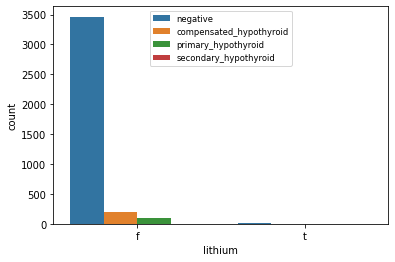

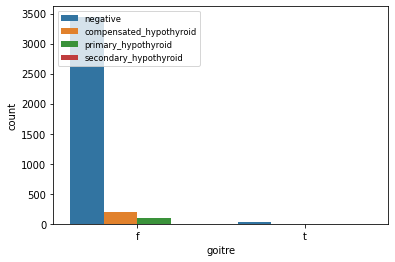

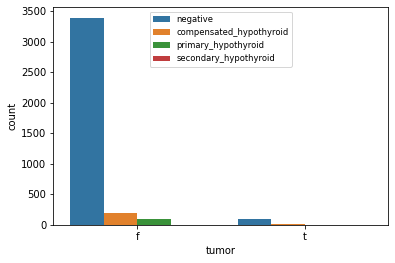

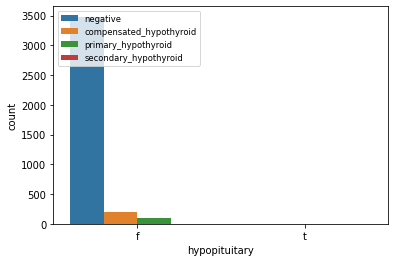

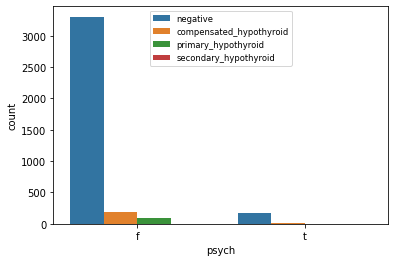

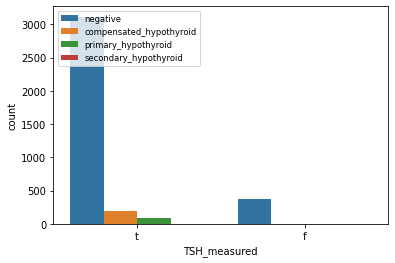

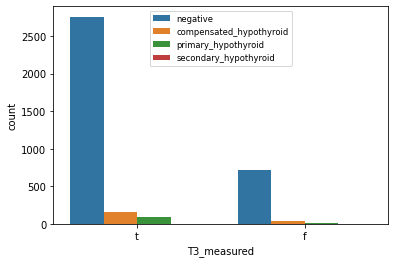

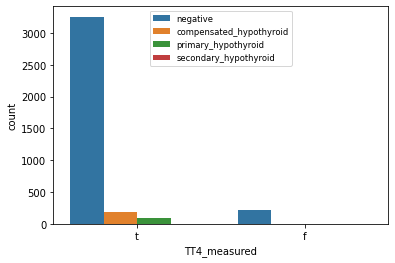

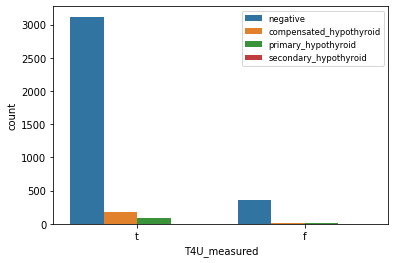

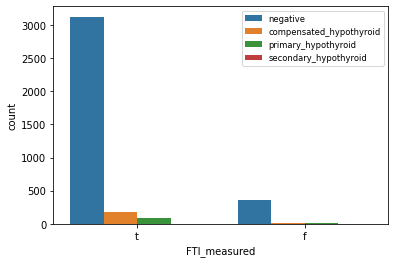

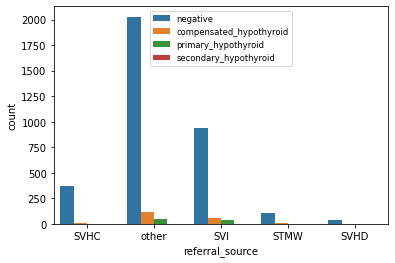

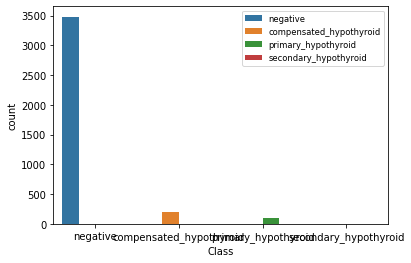

In [23]:
for feature in categorical_features:
    sns.countplot(data[feature],hue=data["Class"])
    plt.xlabel(feature)
    plt.legend(loc='best',fontsize="small")
    plt.show()

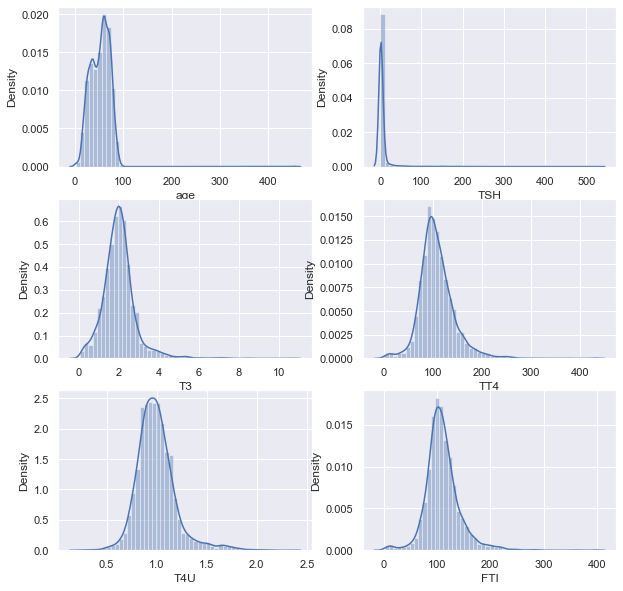

In [24]:
sns.set()
plt.figure(figsize=(10,10))
plotnumber = 1
for feature in numerical_features:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

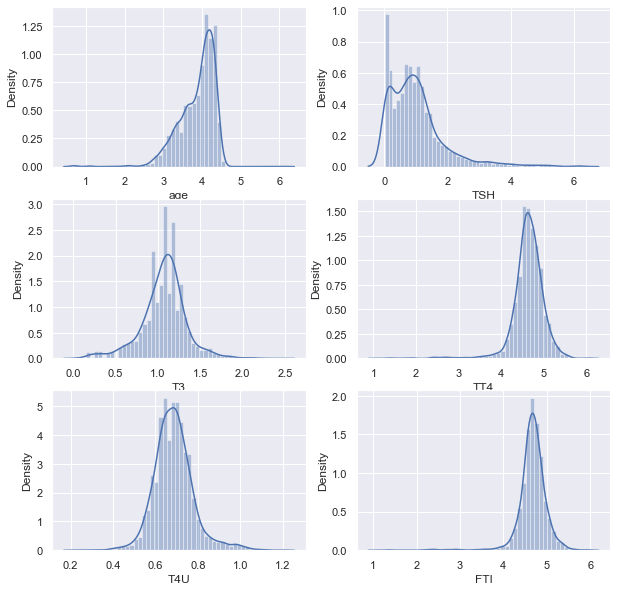

In [25]:
sns.set()
plt.figure(figsize=(10,10))
plotnumber = 1
for feature in numerical_features:
    data[feature]+=1
    data[feature] = np.log(data[feature])
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [26]:
new_cat_feat = ["sex","referral_source","Class"]

categorical_features = [feature for feature in categorical_features if feature not in new_cat_feat]

categorical_features

['on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured']

In [27]:
data["kfold"] = -1

In [29]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

for fold,(train_indices,valid_indices) in enumerate(kf.split(X=data)):
    data.loc[valid_indices,"kfold"] = fold

In [30]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class,kfold
0,3.737670,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.832909,t,1.252763,t,4.836282,t,0.760806,t,4.700480,SVHC,negative,0
1,3.178054,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.629241,t,1.098612,t,4.634729,f,NaN,f,NaN,other,negative,4
2,3.850148,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.683097,f,NaN,t,4.700480,t,0.647103,t,4.795791,other,negative,2
3,4.262680,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.148420,t,1.064711,t,5.170484,f,NaN,f,NaN,other,negative,3
4,4.262680,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.542324,t,0.788457,t,4.127134,t,0.625938,t,4.262680,SVI,negative,4


In [31]:
data.to_csv("thyroid_data.csv",index=False)